In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load CSV files
file_path_ob = 'output_ob_all.csv'
file_path_hy = 'output_hy_all.csv'
file_path_ed = 'output_ed_all.csv'
file_path_cl = 'output_cl_all.csv'

In [6]:
data_ob = pd.read_csv(file_path_ob)
data_hy = pd.read_csv(file_path_hy)
data_ed = pd.read_csv(file_path_ed)
data_cl = pd.read_csv(file_path_cl)


In [9]:
# Find maximum values for each metric across all implementations
max_values = pd.concat([data_ob.drop(columns=['timestamp', 'Total Requests']),
                        data_hy.drop(columns=['timestamp', 'Total Requests']),
                        data_ed.drop(columns=['timestamp', 'Total Requests']),
                        data_cl.drop(columns=['timestamp', 'Total Requests'])], axis=0).max()

In [10]:
max_values

Overall CPU Usage (%)                 9.930000e+01
Overall Memory Usage (%)              9.820000e+01
Overall Disk Read (bytes/s)           1.539486e+09
Overall Disk Write (bytes/s)          3.304230e+08
Overall Network Upload (bytes/s)      4.429654e+06
Overall Network Download (bytes/s)    1.967089e+07
Overall GPU Usage (%)                 4.950000e+01
Overall GPU Memory Used (MB)          4.650605e+01
dtype: float64

In [41]:
# Normalize each metric for each implementation
norm_data_ob = data_ob.drop(columns=['timestamp', 'Total Requests']).div(max_values) * 100
norm_data_hy = data_hy.drop(columns=['timestamp', 'Total Requests']).div(max_values) * 100
norm_data_ed = data_ed.drop(columns=['timestamp', 'Total Requests']).div(max_values) * 100
norm_data_cl = data_cl.drop(columns=['timestamp', 'Total Requests']).div(max_values) * 100

In [42]:
# Calculate average of normalized metrics for each implementation
avg_norm_metrics_ob = norm_data_ob.mean()
avg_norm_metrics_hy = norm_data_hy.mean()
avg_norm_metrics_ed = norm_data_ed.mean()
avg_norm_metrics_cl = norm_data_cl.mean()

In [44]:
norm_data_ob

Overall CPU Usage (%)  Overall Memory Usage (%)  \
0                  6.193353                 32.688391   
1                 46.022155                  7.739308   
2                 39.174220                 34.317719   
3                 26.787513                  8.146640   
4                 47.230614                 34.572301   
...                     ...                       ...   
3123              23.195703                 44.433130   
3124              23.061430                 56.059063   
3125              22.792884                 44.840462   
3126              27.643505                 55.091650   
3127              26.586103                 55.397149   

      Overall Disk Read (bytes/s)  Overall Disk Write (bytes/s)  \
0                        0.000399                      0.000000   
1                        0.000000                      0.295030   
2                        0.059997                      0.163630   
3                        0.000000                      0.000000   
4                        0.039643                      0.080576   
...                           ...                           ...   
3123                     1.228678                      0.014049   
3124                     1.643071                      0.208877   
3125                     1.639657                      0.009504   
3126                     5.867219                      0.040288   
3127                     3.179984                      0.003719   

      Overall Network Upload (bytes/s)  Overall Network Download (bytes/s)  \
0                             0.563306                            0.031247   
1                             1.149887                            0.899054   
2                             4.747448                           11.552924   
3                             1.959566                            1.090459   
4                             8.543737                           25.607968   
...                                ...                                 ...   
3123                          0.906903                            0.077290   
3124                          0.782770                            2.703749   
3125                          0.962317                            0.135734   
3126                          1.009221                            4.383233   
3127                          0.898885                            3.494694   

      Overall GPU Usage (%)  Overall GPU Memory Used (MB)  
0                 77.777778                     68.429618  
1                  0.000000                      0.000000  
2                100.000000                     68.999186  
3                  0.000000                      0.000000  
4                 77.777778                     68.755085  
...                     ...                           ...  
3123               0.000000                     18.316608  
3124               0.000000                      0.000000  
3125               0.000000                     18.298526  
3126               0.000000                      0.000000  
3127               0.000000                      0.000000  

[3128 rows x 8 columns]

In [43]:
avg_norm_metrics_ob

Overall CPU Usage (%)                 31.640849
Overall Memory Usage (%)              51.721400
Overall Disk Read (bytes/s)            3.437377
Overall Disk Write (bytes/s)           0.209221
Overall Network Upload (bytes/s)       4.595126
Overall Network Download (bytes/s)     3.122313
Overall GPU Usage (%)                  0.885238
Overall GPU Memory Used (MB)           7.407518
dtype: float64

In [45]:
avg_norm_metrics_cl

Overall CPU Usage (%)                 15.107940
Overall Memory Usage (%)              40.264792
Overall Disk Read (bytes/s)            0.001009
Overall Disk Write (bytes/s)           0.082515
Overall Network Upload (bytes/s)       8.705975
Overall Network Download (bytes/s)     2.615792
Overall GPU Usage (%)                  0.000000
Overall GPU Memory Used (MB)           0.000000
dtype: float64

In [46]:
avg_norm_metrics_ed

Overall CPU Usage (%)                 50.411040
Overall Memory Usage (%)              58.810193
Overall Disk Read (bytes/s)            2.822075
Overall Disk Write (bytes/s)           0.251082
Overall Network Upload (bytes/s)       1.847018
Overall Network Download (bytes/s)     2.541955
Overall GPU Usage (%)                  0.000000
Overall GPU Memory Used (MB)           0.000000
dtype: float64

In [47]:
avg_norm_metrics_hy

Overall CPU Usage (%)                 48.358646
Overall Memory Usage (%)              76.067375
Overall Disk Read (bytes/s)            2.145392
Overall Disk Write (bytes/s)           0.484226
Overall Network Upload (bytes/s)       1.030468
Overall Network Download (bytes/s)     2.449865
Overall GPU Usage (%)                  0.000000
Overall GPU Memory Used (MB)           0.000000
dtype: float64

In [48]:
avg_norm_utilization = {
    'Cloud': avg_norm_metrics_cl.mean(),
    'Edge': avg_norm_metrics_ed.mean(),
    'Edge-Cloud': avg_norm_metrics_hy.mean(),
    'Oblique': avg_norm_metrics_ob.mean(),
}

# Convert to DataFrame for plotting
avg_norm_utilization_df = pd.DataFrame(list(avg_norm_utilization.items()), columns=['Implementation', 'Average Normalized Utilization'])

In [49]:
avg_norm_utilization_df

Implementation  Average Normalized Utilization
0          Cloud                        8.347253
1           Edge                       14.585420
2     Edge-Cloud                       16.316996
3        Oblique                       12.877380

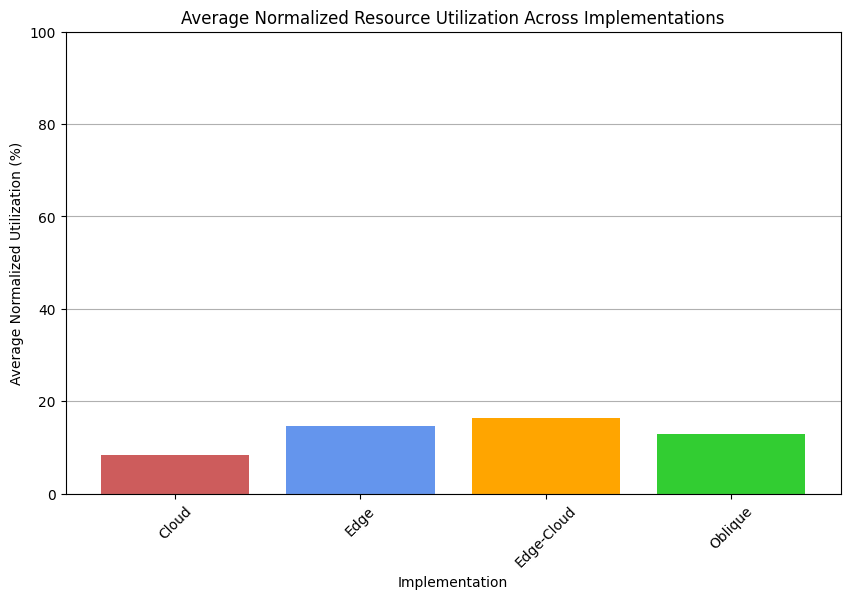

In [50]:
# Convert to DataFrame for plotting
avg_norm_utilization_df = pd.DataFrame(list(avg_norm_utilization.items()), columns=['Implementation', 'Average Normalized Utilization'])

# Plotting the average normalized resource utilization for each implementation
plt.figure(figsize=(10, 6))
plt.bar(avg_norm_utilization_df['Implementation'], avg_norm_utilization_df['Average Normalized Utilization'], color=['indianred', 'cornflowerblue', 'orange', 'limegreen'])
plt.title('Average Normalized Resource Utilization Across Implementations')
plt.xlabel('Implementation')
plt.ylabel('Average Normalized Utilization (%)')
plt.ylim(0, 100)  # Ensuring the y-axis is scaled from 0 to 100
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-')
plt.savefig("aggregated_resource_usage.png")
plt.show()

In [4]:
# Calculate average utilization of all metrics for each implementation
avg_metrics_ob = data_ob.drop(columns=['timestamp', 'Total Requests'])
avg_metrics_hy = data_hy.drop(columns=['timestamp', 'Total Requests'])
avg_metrics_ed = data_ed.drop(columns=['timestamp', 'Total Requests'])
avg_metrics_cl = data_cl.drop(columns=['timestamp', 'Total Requests'])

In [5]:
avg_metrics_ob

Overall CPU Usage (%)  Overall Memory Usage (%)  \
0                  6.150000                 32.100000   
1                 45.700000                  7.600000   
2                 38.900000                 33.700000   
3                 26.600000                  8.000000   
4                 46.900000                 33.950000   
...                     ...                       ...   
3123              23.033333                 43.633333   
3124              22.900000                 55.050000   
3125              22.633333                 44.033333   
3126              27.450000                 54.100000   
3127              26.400000                 54.400000   

      Overall Disk Read (bytes/s)  Overall Disk Write (bytes/s)  \
0                    6.144000e+03                      0.000000   
1                    0.000000e+00                 974848.000000   
2                    9.236480e+05                 540672.000000   
3                    0.000000e+00                      0.000000   
4                    6.103040e+05                 266240.000000   
...                           ...                           ...   
3123                 1.891533e+07                  46421.333333   
3124                 2.529485e+07                 690176.000000   
3125                 2.524228e+07                  31402.666667   
3126                 9.032499e+07                 133120.000000   
3127                 4.895539e+07                  12288.000000   

      Overall Network Upload (bytes/s)  Overall Network Download (bytes/s)  \
0                         24952.500000                        6.146500e+03   
1                         50936.000000                        1.768520e+05   
2                        210295.500000                        2.272563e+06   
3                         86802.000000                        2.145030e+05   
4                        378458.000000                        5.037316e+06   
...                                ...                                 ...   
3123                      40172.666667                        1.520367e+04   
3124                      34674.000000                        5.318515e+05   
3125                      42627.333333                        2.670000e+04   
3126                      44705.000000                        8.622210e+05   
3127                      39817.500000                        6.874375e+05   

      Overall GPU Usage (%)  Overall GPU Memory Used (MB)  
0                      38.5                     31.823915  
1                       0.0                      0.000000  
2                      49.5                     32.088799  
3                       0.0                      0.000000  
4                      38.5                     31.975277  
...                     ...                           ...  
3123                    0.0                      8.518332  
3124                    0.0                      0.000000  
3125                    0.0                      8.509923  
3126                    0.0                      0.000000  
3127                    0.0                      0.000000  

[3128 rows x 8 columns]

In [6]:
avg_metrics_hy

Overall CPU Usage (%)  Overall Memory Usage (%)  \
0                  5.850000                 16.150000   
1                  9.150000                 16.200000   
2                  8.250000                 16.200000   
3                 12.800000                 16.200000   
4                 40.300000                 16.350000   
...                     ...                       ...   
3123              37.733333                 63.166667   
3124              37.266667                 63.800000   
3125              38.100000                 64.066667   
3126              41.050000                 75.850000   
3127              37.433333                 63.533333   

      Overall Disk Read (bytes/s)  Overall Disk Write (bytes/s)  \
0                    0.000000e+00                  0.000000e+00   
1                    0.000000e+00                  0.000000e+00   
2                    0.000000e+00                  0.000000e+00   
3                    3.276800e+04                  1.024000e+04   
4                    6.103040e+05                  1.445888e+06   
...                           ...                           ...   
3123                 4.883797e+06                  3.686400e+04   
3124                 5.219669e+06                  1.501867e+04   
3125                 5.436757e+06                  1.627477e+06   
3126                 1.055334e+07                  0.000000e+00   
3127                 5.147307e+06                  5.188267e+04   

      Overall Network Upload (bytes/s)  Overall Network Download (bytes/s)  \
0                         16046.000000                         1691.500000   
1                         18241.000000                        23405.000000   
2                         29349.000000                        11386.000000   
3                         29731.500000                        62488.000000   
4                         30769.000000                        94771.000000   
...                                ...                                 ...   
3123                      75342.666667                       670213.333333   
3124                      28586.000000                       404560.000000   
3125                      31900.333333                         4409.000000   
3126                      40380.500000                        59963.500000   
3127                      34661.000000                         7829.333333   

      Overall GPU Usage (%)  Overall GPU Memory Used (MB)  
0                         0                             0  
1                         0                             0  
2                         0                             0  
3                         0                             0  
4                         0                             0  
...                     ...                           ...  
3123                      0                             0  
3124                      0                             0  
3125                      0                             0  
3126                      0                             0  
3127                      0                             0  

[3128 rows x 8 columns]

In [7]:
avg_metrics_ed

Overall CPU Usage (%)  Overall Memory Usage (%)  \
0                  7.050000                 22.800000   
1                 10.350000                 22.800000   
2                  9.000000                 22.800000   
3                 19.450000                 22.800000   
4                 59.500000                 23.100000   
...                     ...                       ...   
3123              51.566667                 63.166667   
3124              49.033333                 63.566667   
3125              46.633333                 64.033333   
3126              45.666667                 64.500000   
3127              51.066667                 64.033333   

      Overall Disk Read (bytes/s)  Overall Disk Write (bytes/s)  \
0                    0.000000e+00                  8.192000e+03   
1                    0.000000e+00                  0.000000e+00   
2                    0.000000e+00                  0.000000e+00   
3                    0.000000e+00                  1.966080e+05   
4                    2.021376e+06                  1.378304e+06   
...                           ...                           ...   
3123                 2.271778e+07                  0.000000e+00   
3124                 1.567949e+07                  1.092267e+04   
3125                 1.234261e+07                  9.557333e+03   
3126                 1.312631e+07                  1.186475e+06   
3127                 1.601809e+07                  2.730667e+04   

      Overall Network Upload (bytes/s)  Overall Network Download (bytes/s)  \
0                         23004.000000                        1.584500e+03   
1                         16851.500000                        2.403450e+04   
2                         27577.000000                        1.049150e+04   
3                         41459.500000                        1.464120e+05   
4                         64003.000000                        7.096850e+04   
...                                ...                                 ...   
3123                      22899.000000                        1.931063e+05   
3124                      41264.333333                        1.078367e+04   
3125                      40474.000000                        1.102843e+06   
3126                      19625.000000                        3.799000e+03   
3127                      41102.333333                        5.342893e+05   

      Overall GPU Usage (%)  Overall GPU Memory Used (MB)  
0                         0                             0  
1                         0                             0  
2                         0                             0  
3                         0                             0  
4                         0                             0  
...                     ...                           ...  
3123                      0                             0  
3124                      0                             0  
3125                      0                             0  
3126                      0                             0  
3127                      0                             0  

[3128 rows x 8 columns]

In [8]:
avg_metrics_cl

Overall CPU Usage (%)  Overall Memory Usage (%)  \
0                 10.350000                 22.200000   
1                 10.750000                 22.200000   
2                  8.850000                 22.200000   
3                 24.550000                 22.400000   
4                 68.750000                 23.200000   
...                     ...                       ...   
3123              13.333333                 40.366667   
3124              12.066667                 40.366667   
3125              12.400000                 40.366667   
3126              16.366667                 40.366667   
3127              15.733333                 40.366667   

      Overall Disk Read (bytes/s)  Overall Disk Write (bytes/s)  \
0                             0.0                  0.000000e+00   
1                             0.0                  0.000000e+00   
2                             0.0                  8.192000e+03   
3                             0.0                  2.867200e+05   
4                          2048.0                  2.121728e+06   
...                           ...                           ...   
3123                          0.0                  9.557333e+03   
3124                          0.0                  9.966933e+04   
3125                          0.0                  6.144000e+04   
3126                          0.0                  2.730667e+04   
3127                          0.0                  6.144000e+04   

      Overall Network Upload (bytes/s)  Overall Network Download (bytes/s)  \
0                          8685.500000                         4432.500000   
1                         28818.500000                        22599.500000   
2                         24286.000000                        20423.500000   
3                         38917.500000                       164309.500000   
4                         24016.500000                        56847.000000   
...                                ...                                 ...   
3123                      49239.333333                       466312.333333   
3124                      21496.666667                         4353.000000   
3125                      31767.333333                       191121.333333   
3126                      82128.666667                       214986.333333   
3127                      58886.333333                       829248.666667   

      Overall GPU Usage (%)  Overall GPU Memory Used (MB)  
0                       0.0                           0.0  
1                       0.0                           0.0  
2                       0.0                           0.0  
3                       0.0                           0.0  
4                       0.0                           0.0  
...                     ...                           ...  
3123                    0.0                           0.0  
3124                    0.0                           0.0  
3125                    0.0                           0.0  
3126                    0.0                           0.0  
3127                    0.0                           0.0  

[3128 rows x 8 columns]

In [10]:
# Calculate max utilization of all metrics for each implementation
max_metrics_ob = data_ob.drop(columns=['timestamp', 'Total Requests']).max()
max_metrics_hy = data_hy.drop(columns=['timestamp', 'Total Requests']).max()
max_metrics_ed = data_ed.drop(columns=['timestamp', 'Total Requests']).max()
max_metrics_cl = data_cl.drop(columns=['timestamp', 'Total Requests']).max()

In [14]:
# Function to normalize each metric within each dataset
def normalize(df, columns):
    return df[columns].apply(lambda x: x / x.max(), axis=0)

In [15]:
# Columns to normalize
columns_to_normalize = [
    'Overall CPU Usage (%)', 'Overall Memory Usage (%)', 
    'Overall Disk Read (bytes/s)', 'Overall Disk Write (bytes/s)', 
    'Overall Network Upload (bytes/s)', 'Overall Network Download (bytes/s)', 
    'Overall GPU Usage (%)', 'Overall GPU Memory Used (MB)'
]


In [16]:
# Normalize the dataframes
normalized_cl = normalize(data_cl, columns_to_normalize)
normalized_ed = normalize(data_ed, columns_to_normalize)
normalized_hy = normalize(data_hy, columns_to_normalize)
normalized_ob = normalize(data_ob, columns_to_normalize)

In [17]:
normalized_cl.mean()

Overall CPU Usage (%)                 0.206074
Overall Memory Usage (%)              0.686459
Overall Disk Read (bytes/s)           0.000855
Overall Disk Write (bytes/s)          0.018625
Overall Network Upload (bytes/s)      0.087060
Overall Network Download (bytes/s)    0.026158
Overall GPU Usage (%)                      NaN
Overall GPU Memory Used (MB)               NaN
dtype: float64

In [18]:
normalized_ed.mean()

Overall CPU Usage (%)                 0.504280
Overall Memory Usage (%)              0.686294
Overall Disk Read (bytes/s)           0.063271
Overall Disk Write (bytes/s)          0.009076
Overall Network Upload (bytes/s)      0.039436
Overall Network Download (bytes/s)    0.056532
Overall GPU Usage (%)                      NaN
Overall GPU Memory Used (MB)               NaN
dtype: float64

In [19]:
normalized_hy.mean()

Overall CPU Usage (%)                 0.483586
Overall Memory Usage (%)              0.770879
Overall Disk Read (bytes/s)           0.045656
Overall Disk Write (bytes/s)          0.004842
Overall Network Upload (bytes/s)      0.075089
Overall Network Download (bytes/s)    0.052467
Overall GPU Usage (%)                      NaN
Overall GPU Memory Used (MB)               NaN
dtype: float64

In [20]:
normalized_ob.mean()

Overall CPU Usage (%)                 0.320606
Overall Memory Usage (%)              0.517214
Overall Disk Read (bytes/s)           0.034374
Overall Disk Write (bytes/s)          0.002681
Overall Network Upload (bytes/s)      0.072576
Overall Network Download (bytes/s)    0.085418
Overall GPU Usage (%)                 0.008852
Overall GPU Memory Used (MB)          0.074075
dtype: float64

In [8]:
# Add a column for the average normalized utilization in each dataframe
normalized_cl['Average Normalized Utilization'] = normalized_cl.mean(axis=1)
normalized_ed['Average Normalized Utilization'] = normalized_ed.mean(axis=1)
normalized_hy['Average Normalized Utilization'] = normalized_hy.mean(axis=1)
normalized_ob['Average Normalized Utilization'] = normalized_ob.mean(axis=1)

In [10]:
overall_average_normalized_utilization = (
    normalized_cl['Average Normalized Utilization'].mean() + 
    normalized_ed['Average Normalized Utilization'].mean() + 
    normalized_hy['Average Normalized Utilization'].mean() + 
    normalized_ob['Average Normalized Utilization'].mean()
) / 4


In [11]:
overall_average_normalized_utilization

0.19389516959495273

In [10]:
max_metrics_ob

Overall CPU Usage (%)                 9.800000e+01
Overall Memory Usage (%)              9.820000e+01
Overall Disk Read (bytes/s)           1.539486e+09
Overall Disk Write (bytes/s)          2.578992e+08
Overall Network Upload (bytes/s)      2.804632e+06
Overall Network Download (bytes/s)    7.190408e+06
Overall GPU Usage (%)                 4.950000e+01
Overall GPU Memory Used (MB)          4.650605e+01
dtype: float64

In [11]:
# Normalize each metric to a scale between 0 and 100
norm_metrics_ob = (avg_metrics_ob / max_metrics_ob) * 100
norm_metrics_hy = (avg_metrics_hy / max_metrics_hy) * 100
norm_metrics_ed = (avg_metrics_ed / max_metrics_ed) * 100
norm_metrics_cl = (avg_metrics_cl / max_metrics_cl) * 100

In [12]:
norm_metrics_ob

Overall CPU Usage (%)                 32.060574
Overall Memory Usage (%)              51.721400
Overall Disk Read (bytes/s)            3.437377
Overall Disk Write (bytes/s)           0.268056
Overall Network Upload (bytes/s)       7.257573
Overall Network Download (bytes/s)     8.541752
Overall GPU Usage (%)                  0.885238
Overall GPU Memory Used (MB)           7.407518
dtype: float64

In [13]:
norm_metrics_hy

Overall CPU Usage (%)                 48.358646
Overall Memory Usage (%)              77.087886
Overall Disk Read (bytes/s)            4.565582
Overall Disk Write (bytes/s)           0.484226
Overall Network Upload (bytes/s)       7.508894
Overall Network Download (bytes/s)     5.246652
Overall GPU Usage (%)                       NaN
Overall GPU Memory Used (MB)                NaN
dtype: float64

In [14]:
norm_metrics_ed

Overall CPU Usage (%)                 50.427968
Overall Memory Usage (%)              68.629363
Overall Disk Read (bytes/s)            6.327148
Overall Disk Write (bytes/s)           0.907632
Overall Network Upload (bytes/s)       3.943554
Overall Network Download (bytes/s)     5.653212
Overall GPU Usage (%)                       NaN
Overall GPU Memory Used (MB)                NaN
dtype: float64

In [15]:
norm_metrics_cl

Overall CPU Usage (%)                 20.607396
Overall Memory Usage (%)              68.645878
Overall Disk Read (bytes/s)            0.085522
Overall Disk Write (bytes/s)           1.862464
Overall Network Upload (bytes/s)       8.705975
Overall Network Download (bytes/s)     2.615792
Overall GPU Usage (%)                       NaN
Overall GPU Memory Used (MB)                NaN
dtype: float64

In [21]:
normalized_ob

Overall CPU Usage (%)  Overall Memory Usage (%)  \
0                  0.062755                  0.326884   
1                  0.466327                  0.077393   
2                  0.396939                  0.343177   
3                  0.271429                  0.081466   
4                  0.478571                  0.345723   
...                     ...                       ...   
3123               0.235034                  0.444331   
3124               0.233673                  0.560591   
3125               0.230952                  0.448405   
3126               0.280102                  0.550916   
3127               0.269388                  0.553971   

      Overall Disk Read (bytes/s)  Overall Disk Write (bytes/s)  \
0                        0.000004                      0.000000   
1                        0.000000                      0.003780   
2                        0.000600                      0.002096   
3                        0.000000                      0.000000   
4                        0.000396                      0.001032   
...                           ...                           ...   
3123                     0.012287                      0.000180   
3124                     0.016431                      0.002676   
3125                     0.016397                      0.000122   
3126                     0.058672                      0.000516   
3127                     0.031800                      0.000048   

      Overall Network Upload (bytes/s)  Overall Network Download (bytes/s)  \
0                             0.008897                            0.000855   
1                             0.018161                            0.024596   
2                             0.074982                            0.316055   
3                             0.030950                            0.029832   
4                             0.134940                            0.700561   
...                                ...                                 ...   
3123                          0.014324                            0.002114   
3124                          0.012363                            0.073967   
3125                          0.015199                            0.003713   
3126                          0.015940                            0.119913   
3127                          0.014197                            0.095605   

      Overall GPU Usage (%)  Overall GPU Memory Used (MB)  
0                  0.777778                      0.684296  
1                  0.000000                      0.000000  
2                  1.000000                      0.689992  
3                  0.000000                      0.000000  
4                  0.777778                      0.687551  
...                     ...                           ...  
3123               0.000000                      0.183166  
3124               0.000000                      0.000000  
3125               0.000000                      0.182985  
3126               0.000000                      0.000000  
3127               0.000000                      0.000000  

[3128 rows x 8 columns]

In [22]:
normalized_ob.mean()

Overall CPU Usage (%)                 0.320606
Overall Memory Usage (%)              0.517214
Overall Disk Read (bytes/s)           0.034374
Overall Disk Write (bytes/s)          0.002681
Overall Network Upload (bytes/s)      0.072576
Overall Network Download (bytes/s)    0.085418
Overall GPU Usage (%)                 0.008852
Overall GPU Memory Used (MB)          0.074075
dtype: float64

In [23]:
normalized_cl.mean()

Overall CPU Usage (%)                 0.206074
Overall Memory Usage (%)              0.686459
Overall Disk Read (bytes/s)           0.000855
Overall Disk Write (bytes/s)          0.018625
Overall Network Upload (bytes/s)      0.087060
Overall Network Download (bytes/s)    0.026158
Overall GPU Usage (%)                      NaN
Overall GPU Memory Used (MB)               NaN
dtype: float64

In [24]:
normalized_ed.mean()

Overall CPU Usage (%)                 0.504280
Overall Memory Usage (%)              0.686294
Overall Disk Read (bytes/s)           0.063271
Overall Disk Write (bytes/s)          0.009076
Overall Network Upload (bytes/s)      0.039436
Overall Network Download (bytes/s)    0.056532
Overall GPU Usage (%)                      NaN
Overall GPU Memory Used (MB)               NaN
dtype: float64

In [25]:
normalized_hy.mean()

Overall CPU Usage (%)                 0.483586
Overall Memory Usage (%)              0.770879
Overall Disk Read (bytes/s)           0.045656
Overall Disk Write (bytes/s)          0.004842
Overall Network Upload (bytes/s)      0.075089
Overall Network Download (bytes/s)    0.052467
Overall GPU Usage (%)                      NaN
Overall GPU Memory Used (MB)               NaN
dtype: float64

In [26]:
max_values = pd.concat([normalized_ob.mean(), normalized_hy.mean(), normalized_ed.mean(), normalized_cl.mean()], axis=1).max(axis=1)
max_values

Overall CPU Usage (%)                 0.504280
Overall Memory Usage (%)              0.770879
Overall Disk Read (bytes/s)           0.063271
Overall Disk Write (bytes/s)          0.018625
Overall Network Upload (bytes/s)      0.087060
Overall Network Download (bytes/s)    0.085418
Overall GPU Usage (%)                 0.008852
Overall GPU Memory Used (MB)          0.074075
dtype: float64

In [27]:
# Normalize each metric to a scale between 0 and 100
norm_metrics_ob = (normalized_ob.mean() / max_values) * 100
norm_metrics_hy = (normalized_hy.mean() / max_values) * 100
norm_metrics_ed = (normalized_ed.mean() / max_values) * 100
norm_metrics_cl = (normalized_cl.mean() / max_values) * 100

In [28]:
norm_metrics_ob

Overall CPU Usage (%)                  63.576970
Overall Memory Usage (%)               67.094069
Overall Disk Read (bytes/s)            54.327429
Overall Disk Write (bytes/s)           14.392566
Overall Network Upload (bytes/s)       83.363126
Overall Network Download (bytes/s)    100.000000
Overall GPU Usage (%)                 100.000000
Overall GPU Memory Used (MB)          100.000000
dtype: float64

In [29]:
norm_metrics_hy

Overall CPU Usage (%)                  95.896479
Overall Memory Usage (%)              100.000000
Overall Disk Read (bytes/s)            72.158615
Overall Disk Write (bytes/s)           25.999218
Overall Network Upload (bytes/s)       86.249893
Overall Network Download (bytes/s)     61.423603
Overall GPU Usage (%)                        NaN
Overall GPU Memory Used (MB)                 NaN
dtype: float64

In [30]:
norm_metrics_ed

Overall CPU Usage (%)                 100.000000
Overall Memory Usage (%)               89.027429
Overall Disk Read (bytes/s)           100.000000
Overall Disk Write (bytes/s)           48.732829
Overall Network Upload (bytes/s)       45.297102
Overall Network Download (bytes/s)     66.183283
Overall GPU Usage (%)                        NaN
Overall GPU Memory Used (MB)                 NaN
dtype: float64

In [31]:
norm_metrics_cl

Overall CPU Usage (%)                  40.865014
Overall Memory Usage (%)               89.048852
Overall Disk Read (bytes/s)             1.351664
Overall Disk Write (bytes/s)          100.000000
Overall Network Upload (bytes/s)      100.000000
Overall Network Download (bytes/s)     30.623600
Overall GPU Usage (%)                        NaN
Overall GPU Memory Used (MB)                 NaN
dtype: float64

In [32]:
# Calculate the average of the normalized values for each implementation
avg_norm_utilization = {
    'Oblique': norm_metrics_ob.mean(),
    'Hybrid': norm_metrics_hy.mean(),
    'Edge': norm_metrics_ed.mean(),
    'Cloud': norm_metrics_cl.mean()
}

In [33]:
avg_norm_utilization

{'Oblique': 72.84427001511193,
 'Hybrid': 73.62130157730195,
 'Edge': 74.8734405559493,
 'Cloud': 60.31485511968875}

In [34]:
# Calculate the average of the normalized values for each implementation
avg_norm_utilization = {
    'Cloud': norm_metrics_cl.mean(),
    'Edge': norm_metrics_ed.mean(),
    'Hybrid': norm_metrics_hy.mean(),
    'Oblique': norm_metrics_ob.mean(),
}

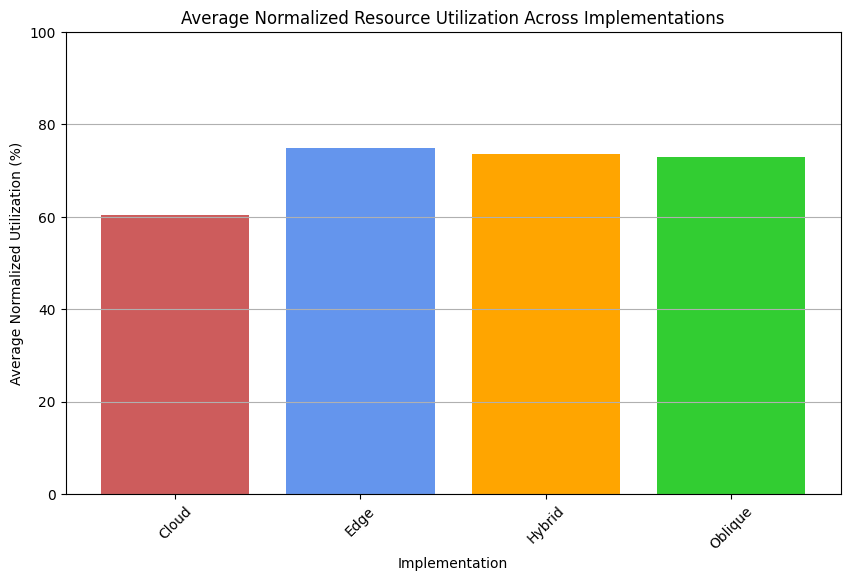

In [35]:
# Convert to DataFrame for plotting
avg_norm_utilization_df = pd.DataFrame(list(avg_norm_utilization.items()), columns=['Implementation', 'Average Normalized Utilization'])

# Plotting the average normalized resource utilization for each implementation
plt.figure(figsize=(10, 6))
plt.bar(avg_norm_utilization_df['Implementation'], avg_norm_utilization_df['Average Normalized Utilization'], color=['indianred', 'cornflowerblue', 'orange', 'limegreen'])
plt.title('Average Normalized Resource Utilization Across Implementations')
plt.xlabel('Implementation')
plt.ylabel('Average Normalized Utilization (%)')
plt.ylim(0, 100)  # Ensuring the y-axis is scaled from 0 to 100
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-')
plt.savefig("aggregated_resource_usage.png")
plt.show()